In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Smarket.csv into a Dataframe named stocks
google = pd.read_csv('Data/google.csv', na_values="NaN").dropna()

# print the information of the dataset
#print(google.info())

# print # of rows, # of columns
print(google.shape)

# print the first row
###     print(stocks.loc[0])

# print the first five rows
google.head()

#print mean of rating


(9360, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [3]:
# - Installs : Remove + and ,

google['Installs'] = google['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
google['Installs'] = google['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
google['Installs'] = google['Installs'].apply(lambda x: int(x))


## Data Cleansing

In [4]:
google['Installs'] = google['Installs'].apply(lambda x: float(x))

google['Price'] = google['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google['Price'] = google['Price'].apply(lambda x: float(x))

google['Reviews'] = google['Reviews'].apply(lambda x: int(x))

In [5]:
google['Content Rating'].value_counts()
google['ContentRating2'] = pd.factorize(google['Content Rating'])[0]

In [6]:
# convert the column 'Category' to numeric values
print(google['Category'].value_counts())

google['Category2'] = 0
google.loc[google["Category"] == "FAMILY", "Category2"] = 1
google.loc[google["Category"] == "GAME", "Category2"] = 2
google.loc[google["Category"] == "TOOLS", "Category2"] = 3

google['Category2'].value_counts()


FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64


0    5784
1    1746
2    1097
3     733
Name: Category2, dtype: int64

In [7]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return 0

google["Size"] = google["Size"].map(change_size)

#filling Size which had NA
google.Size.fillna(method = 'ffill', inplace = True)

In [8]:
print(google["Type"].unique())
google.Type = google.Type.map({'Free':0, 'Paid':1})

['Free' 'Paid']


In [9]:
# convert rating to binary

def partion(x):
    if x < 4:
        return 0
    return 1
google['Rating_Score'] = google['Rating'].map(partion)

In [10]:
google['Rating_Score'].value_counts()

1    7363
0    1997
Name: Rating_Score, dtype: int64

In [11]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ContentRating2,Category2,Rating_Score
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,0,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,0,1


# Code

In [12]:
from sklearn.cross_validation import train_test_split

predictors = ['Reviews' , 'Installs', 'Size', 'Type', 'Price', 'ContentRating2', 'Category2']

X = google[predictors]
y = google['Rating_Score']
X_train, X_test, y_train, y_test = train_test_split\
  (X, y, train_size = 0.6, random_state = 8)

/Users/HudsonMoss/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Decsion Tree

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=7, random_state=30)

clf.fit(X_train,y_train)

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print(classification_report(y_test, clf.predict(X_test)))
#if rating is less than 4 = 0; more than or equal to 4 = 1 
#the decision tree predicted Apps that had a score less than 4 65% of the time
#predicted Apps that would be 4 or greater 80%
print('\n')
pred = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['0', '1'], columns=['0', '1'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

Accuracy of Decision Tree classifier on test set: 0.78
             precision    recall  f1-score   support

          0       0.43      0.05      0.10       804
          1       0.79      0.98      0.88      2940

avg / total       0.71      0.78      0.71      3744





True,0,1
Predicted,,
0,44,58
1,760,2882


[('Reviews', 0.6670554676768266), ('Installs', 0.1665059367244229), ('Size', 0.06966846663339318), ('Type', 0.018573425776079868), ('Price', 0.04506311097744477), ('ContentRating2', 0.007684406060384052), ('Category2', 0.025449186151448724)]


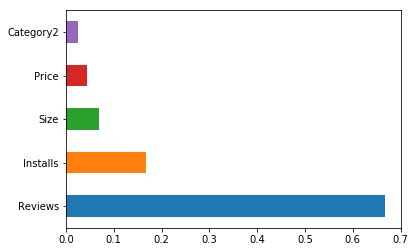

In [14]:
# View a list of the features and their importance scores
print(list(zip(X_train, clf.feature_importances_)))

# plot the important features
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')


In [ ]:
#### Function to print the tree

from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus as pdp
from IPython.display import Image

# This function creates images of tree models using pydotplus
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [ ]:
graph = print_tree(clf, features=X.columns)
Image(graph.create_png())

# Random Forrest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_features=3, random_state=8)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

print('Accuracy of Random Forrest classifier on test set: {:.2f}'
        .format(rfc.score(X_test, y_test)))
print(classification_report(y_test, rfc.predict(X_test)))
#Scores 4 or 5 93% of the time
#Scores less than 4 75% of the time
print('\n')
pred = rfc.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['0', '1'], columns=['0', '1'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

Accuracy of Random Forrest classifier on test set: 0.75
             precision    recall  f1-score   support

          0       0.42      0.40      0.41       804
          1       0.84      0.85      0.84      2940

avg / total       0.75      0.75      0.75      3744





True,0,1
Predicted,,
0,322,438
1,482,2502


[('Reviews', 0.4662390491430208), ('Installs', 0.11579420574054641), ('Size', 0.30623665827528673), ('Type', 0.004390446881335524), ('Price', 0.01996915061597958), ('ContentRating2', 0.03238959101806398), ('Category2', 0.054980898325767025)]


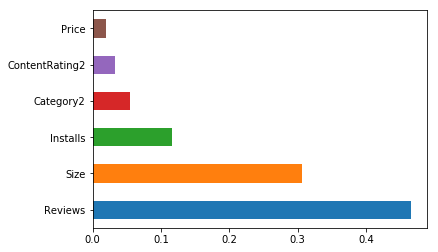

In [17]:
# View a list of the features and their importance scores
print(list(zip(X_train, rfc.feature_importances_)))

# plot the important features
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')

# Support Vector Machine

#create a support vector model
from sklearn.svm import SVC 
svc = SVC(C = 1.0, kernel = 'linear')
svc.fit(X_train, y_train)

print('Accuracy of SVC classifier on test set: {:.2f}'
        .format(svc.score(X_test, y_test)))
    

# Neural Network

In [18]:
# To improve the neural network performance, normalize the input variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

In [19]:
nn_columns = ['Reviews', 'Size', 'Installs']
#mlp.fit(X_train[nn_columns],y_train)

In [20]:
# create a neural network model

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (30,30,30), random_state=30)
mlp.fit(X_train_nn, y_train)

pred_nn= mlp.predict(X_test_nn)

print('Accuracy of Neural Network classifier on test set: {:.2f}'
        .format(mlp.score(X_test_nn, y_test)))

from sklearn.metrics import classification_report, confusion_matrix  

print(classification_report(y_test, mlp.predict(X_test_nn)))
cm3 = pd.DataFrame(confusion_matrix(y_test, pred_nn).T, index=['0', '1'], columns=['0', '1'])
cm3.index.name = 'Predicted'
cm3.columns.name = 'True'
cm3

Accuracy of Neural Network classifier on test set: 0.79
             precision    recall  f1-score   support

          0       0.57      0.00      0.01       804
          1       0.79      1.00      0.88      2940

avg / total       0.74      0.79      0.69      3744



True,0,1
Predicted,,
0,4,3
1,800,2937


# Descriptive 

In [ ]:
from pivottablejs import pivot_ui
pivot_ui(google)

In [ ]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = predictors

explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(google[predictors], labels=google[predictors], 
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()